In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


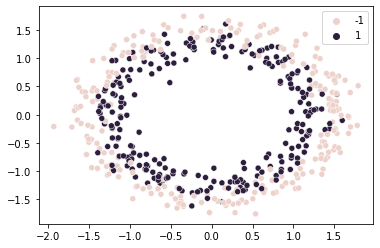

In [5]:
x, y = make_circles(n_samples=1000, noise=0.09)
x = preprocessing.scale(x)

x_test=x[:500]
y_test=y[:500]
x=x[500:]
y=y[500:]

y=np.where(y==0,-1,1)
y_test=np.where(y_test==0,-1,1)

sns.scatterplot(x[:,0],x[:,1],hue=y.reshape(-1))

In [10]:
# Here we solve the primal form of problem but generaly dual form of svm problem is used while using kernel trick 
# as it is more efficient to compute predictions as alpha is non zero only for support vectors unlike weights in
# primal form
class support_vector_machine:
    def __init__(self,C=10,features=2,sigma_sq=0.1,kernel="None"):
        self.C=C
        self.features=features
        self.sigma_sq=sigma_sq
        self.kernel=kernel
        self.weights=np.zeros(features)
        self.bias=0.
        
    def __similarity(self,x,l):
        return np.exp(-sum((x-l)**2)/(2*self.sigma_sq))

    def gaussian_kernel(self,x1,x):
        m=x.shape[0]
        n=x1.shape[0]
        op=[[self.__similarity(x1[x_index],x[l_index]) for l_index in range(m)] for x_index in range(n)]
        return np.array(op)

    def loss_function(self,y,y_hat):
        sum_terms=1-y*y_hat
        sum_terms=np.where(sum_terms<0,0,sum_terms)
        return (self.C*np.sum(sum_terms)/len(y)+sum(self.weights**2)/2)

    def fit(self,x_train,y_train,epochs=1000,print_every_nth_epoch=100,learning_rate=0.01):
        y=y_train.copy()
        x=x_train.copy()
        self.initial=x.copy()
        print(x.shape)
        
        assert x.shape[0]==y.shape[0] , "Samples of x and y don't match."
        assert x.shape[1]==self.features , "Number of Features don't match"
        
        if(self.kernel=="gaussian"):
            x=self.gaussian_kernel(x,x)
            m=x.shape[0]
            self.weights=np.zeros(m)
            print(x.shape)

        n=x.shape[0]
        
        for epoch in range(epochs):
            y_hat=np.dot(x,self.weights)+self.bias
            grad_weights=(-self.C*np.multiply(y,x.T).T+self.weights).T
            
            for weight in range(self.weights.shape[0]):
                grad_weights[weight]=np.where(1-y_hat<=0,self.weights[weight],grad_weights[weight])
            
            grad_weights=np.sum(grad_weights,axis=1)
            self.weights-=learning_rate*grad_weights/n
            grad_bias=-y*self.bias
            grad_bias=np.where(1-y_hat<=0,0,grad_bias)
            grad_bias=sum(grad_bias)
            self.bias-=grad_bias*learning_rate/n
            if((epoch+1)%print_every_nth_epoch==0):
                print("--------------- Epoch {} --> Loss = {} ---------------".format(epoch+1, self.loss_function(y,y_hat)))
    
    def evaluate(self,x,y):
        pred=self.predict(x)
        pred=np.where(pred==-1,0,1)
        diff=np.abs(np.where(y==-1,0,1)-pred)
        return((len(diff)-sum(diff))/len(diff))

    def predict(self,x):
        if(self.kernel=="gaussian"):
            x=self.gaussian_kernel(x,self.initial)
        return np.where(np.dot(x,self.weights)+self.bias>0,1,-1)

In [4]:
def visualize(model,title):
    print("Test Accuracy = {}".format(model.evaluate(x_test,y_test)))
    x1=np.arange(-5,6,0.3)
    x2=np.arange(-5,4,0.3)
    for i in range(len(x1)):
        for j in range(len(x2)):
            pred=model.predict(np.array([np.array(np.array([x1[i],x2[j]]))]))[0]
            if(pred>0.5):
                plt.scatter(x1[i],x2[j],c="r")
            else:
                plt.scatter(x1[i],x2[j],c="b")
    plt.title(title)
    plt.show()

In [11]:
model=support_vector_machine(C=10,kernel="gaussian",sigma_sq=0.01)
model.fit(x,y,epochs=20,print_every_nth_epoch=2,learning_rate=0.01)
print("Training Accuracy = {}".format(model.evaluate(x,y)))

(500, 2)
(500, 500)
--------------- Epoch 2 --> Loss = 9.972175457617276 ---------------
--------------- Epoch 4 --> Loss = 9.917892683520426 ---------------
--------------- Epoch 6 --> Loss = 9.865737959809532 ---------------
--------------- Epoch 8 --> Loss = 9.815627649867755 ---------------
--------------- Epoch 10 --> Loss = 9.767481408375184 ---------------
--------------- Epoch 12 --> Loss = 9.721222051704567 ---------------
--------------- Epoch 14 --> Loss = 9.67677543342226 ---------------
--------------- Epoch 16 --> Loss = 9.634070324693235 ---------------
--------------- Epoch 18 --> Loss = 9.593038299397003 ---------------
--------------- Epoch 20 --> Loss = 9.553613623768769 ---------------
Training Accuracy = 0.858


Test Accuracy = 0.828


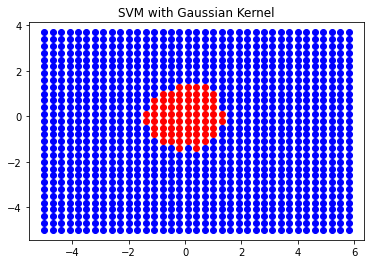

In [7]:
visualize(model,"SVM with Gaussian Kernel")